## Read Data

In [2]:
import pandas as pd

df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.count()

Time      284807
V1        284807
V2        284807
V3        284807
V4        284807
V5        284807
V6        284807
V7        284807
V8        284807
V9        284807
V10       284807
V11       284807
V12       284807
V13       284807
V14       284807
V15       284807
V16       284807
V17       284807
V18       284807
V19       284807
V20       284807
V21       284807
V22       284807
V23       284807
V24       284807
V25       284807
V26       284807
V27       284807
V28       284807
Amount    284807
Class     284807
dtype: int64

In [4]:
df["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

## Train model auto Encoder

In [5]:
df_no_time = df.drop(columns=["Time"])
df_no_time.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
from sklearn.preprocessing import StandardScaler

df_no_time["Amount"] = StandardScaler().fit_transform(df_no_time["Amount"].values.reshape(-1, 1))

In [7]:
df_no_time.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df_no_time , test_size = 0.2, random_state=42)

X_train = X_train[X_train["Class"]==0]
X_train = X_train.drop(columns=["Class"])

y_test = X_test["Class"]
X_test = X_test.drop(columns=["Class"])

X_train = X_train.values
X_test = X_test.values

In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(227451, 29)
(56962, 29)
(56962,)


In [10]:
!pip install tensorflow

In [11]:
!pip install keras

In [12]:
from keras.layers import Input, Dense
from keras.models import load_model, Model
from keras.callbacks import ModelCheckpoint

input_dimension = X_train.shape[1]
hidden_size = 128

# Input
input_layer = Input(shape=(input_dimension,))

# Encoder
encoder = Dense(hidden_size, activation = "relu") (input_layer)
encoder = Dense(hidden_size//2, activation="relu") (encoder)
encoder = Dense(hidden_size//4, activation="relu") (encoder)

# Decoder
decoder = Dense(hidden_size//4, activation="relu") (encoder)
decoder = Dense(hidden_size//2, activation="relu") (decoder)
decoder = Dense(hidden_size, activation = "relu") (decoder)

# Output
output_layer = Dense(input_dimension, activation="relu") (decoder)

auto_encoder_model= Model(inputs=input_layer, outputs=output_layer)
auto_encoder_model.compile(optimizer="adam", loss="mse", metrics=['accuracy'])
auto_encoder_model.summary()



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 29)]              0         
                                                                 
 dense (Dense)               (None, 128)               3840      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dense_4 (Dense)             (None, 64)                2112      
                                                                 
 dense_5 (Dense)             (None, 128)               8320

In [15]:
n_epochs = 50
n_batch_size = 32

save_best = ModelCheckpoint(filepath="best.h5", 
                            monitor="val_loss", verbose=1, save_best_only=True)

history = auto_encoder_model.fit(X_train, X_train, batch_size=n_batch_size, epochs=n_epochs,verbose=1,
                                 shuffle=True, callbacks=[save_best],
                                 validation_data=(X_test, X_test))

Epoch 1/50
7101/7108 [============================>.] - ETA: 0s - loss: 0.5960 - accuracy: 0.9036
Epoch 1: val_loss improved from inf to 0.64584, saving model to best.h5
7108/7108 [==============================] - 28s 4ms/step - loss: 0.5960 - accuracy: 0.9035 - val_loss: 0.6458 - val_accuracy: 0.8305
Epoch 2/50
7097/7108 [============================>.] - ETA: 0s - loss: 0.5948 - accuracy: 0.9113
Epoch 2: val_loss improved from 0.64584 to 0.62808, saving model to best.h5
7108/7108 [==============================] - 35s 5ms/step - loss: 0.5945 - accuracy: 0.9114 - val_loss: 0.6281 - val_accuracy: 0.9257
Epoch 3/50
7107/7108 [============================>.] - ETA: 0s - loss: 0.5946 - accuracy: 0.9123
Epoch 3: val_loss did not improve from 0.62808
7108/7108 [==============================] - 31s 4ms/step - loss: 0.5946 - accuracy: 0.9123 - val_loss: 0.6285 - val_accuracy: 0.9160
Epoch 4/50
7100/7108 [============================>.] - ETA: 0s - loss: 0.5947 - accuracy: 0.9161
Epoch 4: va

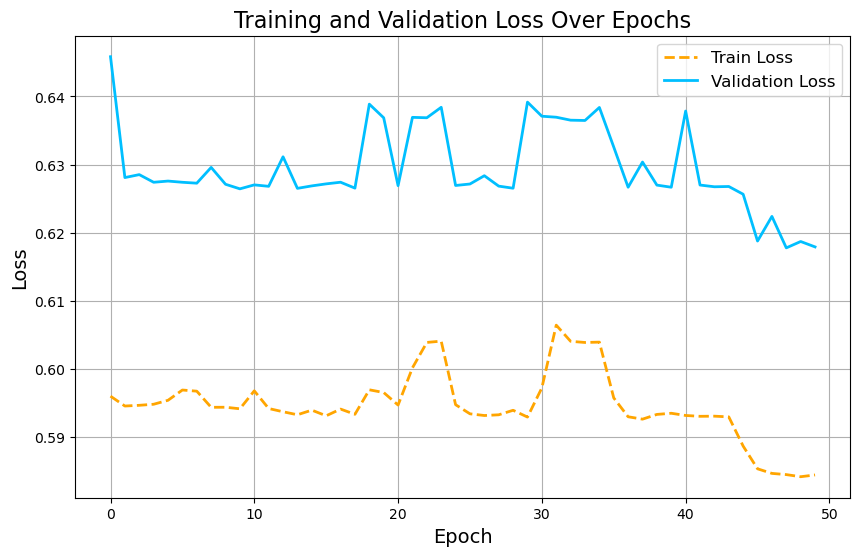

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history["loss"], label="Train Loss", color="#FFA500", linestyle="--", linewidth=2)
plt.plot(history.history["val_loss"], label="Validation Loss", color="#00BFFF", linestyle="-", linewidth=2)

plt.title("Training and Validation Loss Over Epochs", fontsize=16)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Loss", fontsize=14)
plt.legend(loc="upper right", fontsize=12)
plt.grid(True)

plt.show()

In [22]:
import numpy as np

predicts = auto_encoder_model.predict(X_test)
mse = np.mean(np.power(X_test - predicts,2), axis=1)
err_df = pd.DataFrame({"error": mse, "truth": y_test})

1781/1781 [==============================] - 3s 1ms/step


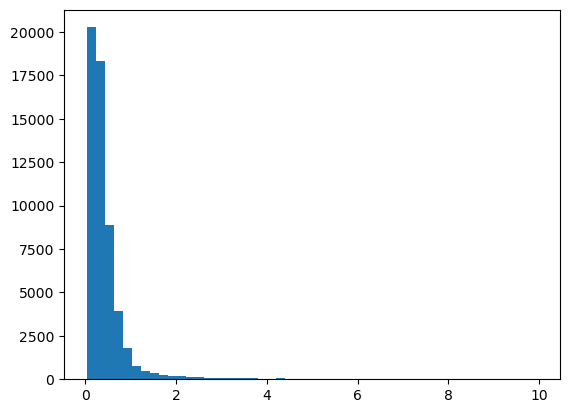

In [23]:
normal_error_df = err_df[(err_df["truth"]==0) & (err_df["error"] < 10)]

_ = plt.hist(normal_error_df.error.values, bins=50)

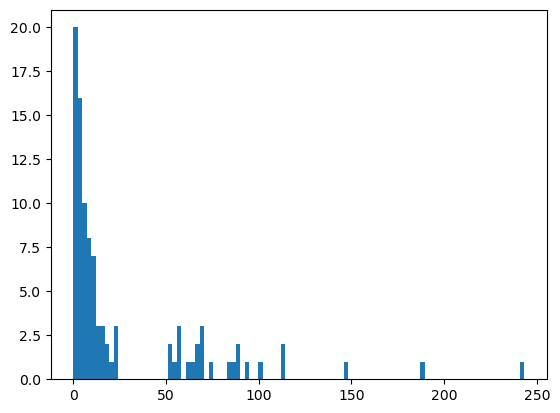

In [24]:
fraud_error_df = err_df[(err_df["truth"]==1)]
_ = plt.hist(fraud_error_df.error.values, bins= 100)

<function matplotlib.pyplot.show(close=None, block=None)>

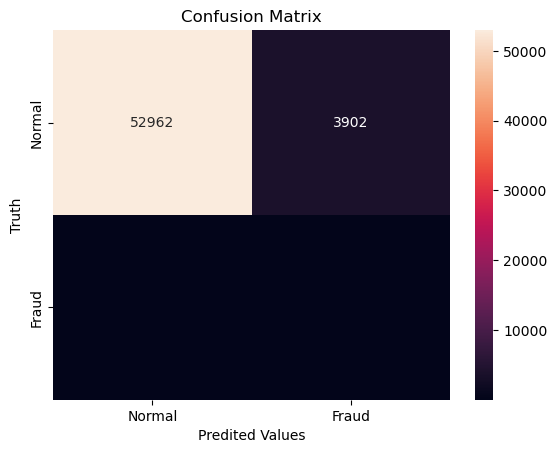

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

threshold = 1

y_pred = [1 if e > threshold else 0 for e in err_df.error.values]
conf_matrix = confusion_matrix(err_df.truth, y_pred)

sns.heatmap(conf_matrix, xticklabels=["Normal", "Fraud"], yticklabels=["Normal","Fraud"], annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predited Values")
plt.ylabel("Truth")
plt.show